  <font color='Blue' size="5"> <center>The Replication Study of the Growth of Eclipse Defects  </center> </font> 

In [1]:
import pandas as pd
import numpy as np
from datetime import date
import math
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
dataset1 = pd.read_csv('data.csv',header=None, usecols=[6,8], names =['product','component'])
dataset2 = pd.read_csv('data.csv',header=None, usecols=[4], infer_datetime_format=True, names=["date"])
dataset1 = dataset1.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
dataset2 = dataset2.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [3]:
#dataset1

In [4]:
datasetAsList=dataset2['date'].tolist()
y=[]
for i in datasetAsList:
    tempList=[]
    temp=i[:10]
    year, month, day=temp.split('-')
    tempList.append(int(year))
    tempList.append(int(month))
    tempList.append(int(day))
    y.append(tempList)

In [5]:
dataset2=pd.DataFrame(y,columns =["year","month","day"]) 
#dataset2

In [6]:
frames = [dataset1, dataset2]
finalDataFrame = df = pd.concat([dataset1.reset_index(drop=True),dataset2.reset_index(drop=True)], axis=1)
finalDataFrame

,product,component,year,month,day
0,Platform,Team,2001,10,10
1,Platform,Team,2001,10,10
2,Platform,Team,2001,10,10
3,Platform,Team,2001,10,10
4,Platform,Team,2001,10,10
5,Platform,Team,2001,10,10
6,Platform,Team,2001,10,10
7,Platform,Team,2001,10,10
8,Platform,Team,2001,10,10
9,Platform,Team,2001,10,10


In [7]:
#ascendingResult1=finalDataFrame.sort_values(['dateStamp'], ascending=[True])
ascendingResult2=finalDataFrame.sort_values(['year', 'month', 'day'], ascending=[True, True, True])
#getting the data collection first day and last day
firstDay=ascendingResult2.head(1)
lastDay=ascendingResult2.tail(1)
f_date = date(firstDay['year'], firstDay['month'], firstDay['day']-1)
l_date = date(lastDay['year'], lastDay['month'], lastDay['day'])
delta = l_date - f_date
recordedDays=delta.days
numberofweeks=recordedDays/7
numberofweeks=math.ceil(numberofweeks)
numberofweeks

321

In [8]:
f_date

datetime.date(2001, 10, 9)

In [9]:
ascendingResult2["component"] = ascendingResult2["product"].map(str) +"."+ ascendingResult2["component"]
#ascendingResult2.drop(['product'], axis=1)

In [10]:
#finding the fourteen major Eclipse components
componentsCount = ascendingResult2.groupby(['component']).count()
componentsCountAscending=componentsCount.sort_values(['year', 'month', 'day'], ascending=[False,False,False])
#componentsCountAscending

In [11]:
#storing 14 major Eclipse components.  
componentsCountAscending=componentsCountAscending[:14]
#componentsCountAscending

In [12]:
requiredComponents=[]
for row in componentsCountAscending.index: 
    requiredComponents.append(row) 
#requiredComponents

In [13]:
#month_template=[['year','month','monthNumber','cummulative_Bugs']]
month_template=[]
for i in range(2001,2008):
    for j in range(1,13):
        temp=[]
        temp.append(i)
        temp.append(j)
        month_template.append(temp)

In [14]:
month_template=month_template[9:]

In [15]:
m=0
for i in month_template:
    if(i[0]==2001) and (i[0]<11):
        pass
    else:
        i.append(m)
        i.append(0)
        i.append(0)
    m=m+1

In [16]:
week_template=[]
for i in range(numberofweeks+1):
    temp=[]
    temp.append(i+1)
    temp.append(0)
    temp.append(0)
    week_template.append(temp)

In [17]:
month_template=pd.DataFrame(month_template,columns =['year','month','monthNumber','monthly_bugs','cummulative_Bugs']) 
week_template=pd.DataFrame(week_template,columns =['weekNumber','weekly_bugs','cummulative_Bugs']) 

In [18]:
def monthly(ind):
    temporary_monthly_template = month_template.copy() 
    tempBugs=0
    for index, row in ascendingResult2.iterrows():
        if(row["component"]== requiredComponents[ind]):
            for index2, row2 in temporary_monthly_template.iterrows():
                if(row2["year"]== row["year"])  and (row2["month"]==row["month"]):
                    row2["monthly_bugs"]=row2["monthly_bugs"]+1
    for index2, row2 in temporary_monthly_template.iterrows():
        tempBugs=tempBugs+row2["monthly_bugs"]
        row2["cummulative_Bugs"]=tempBugs
    return temporary_monthly_template

In [19]:
def weekly(ind):
    #it is the first date taken from cell 7
    f_date
    temporary_weekly_template = week_template.copy() 
    tempBugs=0
    for index, row in ascendingResult2.iterrows():
        if(row["component"]== requiredComponents[ind]):
            l_date = date(row['year'],row['month'],row['day'])
            delta = l_date - f_date
            recordedDays=delta.days
            numberofweeks=math.ceil(recordedDays/7)
            for index2, row2 in temporary_weekly_template.iterrows():
                if(row2["weekNumber"]== numberofweeks):
                    row2["weekly_bugs"]=row2["weekly_bugs"]+1
    for index2, row2 in temporary_weekly_template.iterrows():
        tempBugs=tempBugs+row2["weekly_bugs"]
        row2["cummulative_Bugs"]=tempBugs
    return temporary_weekly_template

## getting monthly data

In [20]:
Platform_UI_month=monthly(0)
JDT_UI_month=monthly(1)
Platform_SWT_month=monthly(2)
Platform_Team_month=monthly(3)
JDT_Core_month=monthly(4)
JDT_Debug_month=monthly(5)
PDE_UI_month=monthly(6)
Platform_Debug_month=monthly(7)
Platform_Resources_month=monthly(8)
Platform_Update_month=monthly(9)
JDT_Text_month=monthly(10)
Platform_UserAssistance_month=monthly(11)
Platform_Ant_month=monthly(12)
Platform_Compare_month=monthly(13)

## getting weekly data

In [21]:
Platform_UI_week=weekly(0)
JDT_UI_week=weekly(1)
Platform_SWT_week=weekly(2)
Platform_Team_week=weekly(3)
JDT_Core_week=weekly(4)
JDT_Debug_week=weekly(5)
PDE_UI_week=weekly(6)
Platform_Debug_week=weekly(7)
Platform_Resources_week=weekly(8)
Platform_Update_week=weekly(9)
JDT_Text_week=weekly(10)
Platform_UserAssistance_week=weekly(11)
Platform_Ant_week=weekly(12)
Platform_Compare_week=weekly(13)

# Random Forest Functions and visualzation

In [22]:
#function for predicting the monthly cummulative frequency with data visualization. Input requires only the dataframe
def monthlyPred(dataRequired):
    #only returns the MRE error but shows the visualization
    X = dataRequired.iloc[:-12, 2:3].values
    y = dataRequired.iloc[:-12, 4].values
    yTest=dataRequired.iloc[-13:-1, 4].values
    yTestV=0
    for val in yTest:
        yTestV=yTestV+val
    regressor = RandomForestRegressor(n_estimators=50, random_state= 0)
    regressor.fit(X,y)
    year07Bug=0
    for i in range(63,75):
        y_pred = regressor.predict(i)
        year07Bug=year07Bug+y_pred
    year07Bug
    MRE=(yTestV-year07Bug)/yTestV
    MRE=MRE*100
    
    #data visualization
    X_grid = np.arange(min(X), max(X), 0.01)
    X_grid = X_grid.reshape((len(X_grid),1))
    plt.scatter(X,y, color='red', linestyle='-', marker='o')
    #plt.plot(X_grid, regressor.predict(X_grid), color='blue')
    plt.title('Bug Vs Year(from data)')
    plt.xlabel("Cumulative month")
    plt.ylabel("Cumulative number of bugs")
    plt.show()
    
    #data visualization by predicting along with for 2007
    X_grid = np.arange(min(X), 74, 0.01)
    X_grid = X_grid.reshape((len(X_grid),1))
    #plt.scatter(X,y, color='red', marker='o')
    plt.plot(X_grid, regressor.predict(X_grid), color='blue')
    plt.title('Bug Vs Year(Prediction using Random Forest)')
    plt.xlabel("Cumulative month")
    plt.ylabel("Cumulative number of bugs")
    plt.show()
    return(MRE[0])

In [23]:
#function for predicting the monthly cummulative frequency with data visualization. Input requires only the dataframe
def monthlyPredPolynomial(dataRequired):
    X = dataRequired.iloc[:-12, 2:3].values
    y = dataRequired.iloc[:-12, 4].values
    yTest=dataRequired.iloc[-13:-1, 4].values
    yTestV=0
    poly_reg = PolynomialFeatures(degree = 2)
    X_poly = poly_reg.fit_transform(X)
    poly_reg.fit(X_poly, y)
    lin_reg_2 = LinearRegression()
    lin_reg_2.fit(X_poly, y)
    for val in yTest:
        yTestV=yTestV+val
    year07Bug=0
    for i in range(63,75):
        y_pred = lin_reg_2.predict(poly_reg.fit_transform(i))
        year07Bug=year07Bug+y_pred
    MRE=(yTestV-year07Bug[0])/yTestV
    MRE=MRE*100
    print(MRE)
    X_grid = np.arange(min(X), 74, 0.1)
    X_grid = X_grid.reshape((len(X_grid), 1))
    plt.scatter(X, y, color = 'red', label="actual data")
    plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue', label="Trained model")
    plt.title('Bug Vs Year(Polynomail regression)')
    plt.xlabel("Cumulative month")
    plt.ylabel("Cumulative number of bugs")
    plt.legend()
    plt.show()
    return(MRE)

In [24]:
#function for predicting the weekly cummulative frequency with data visualization. Input requires only the dataframe
def weeklyPred(dataRequired):
    #only returns the MRE error but shows the visualization
    X = dataRequired.iloc[:-28, 0:1].values
    y = dataRequired.iloc[:-28, 2].values
    yTest=dataRequired.iloc[-29:-1, 2].values
    yTestV=0
    for val in yTest:
        yTestV=yTestV+val
    regressor = RandomForestRegressor(n_estimators=50, random_state= 0)
    regressor.fit(X,y)
    year07Bug=0
    for i in range(295,323):
        y_pred = regressor.predict(i)
        year07Bug=year07Bug+y_pred
    year07Bug
    MRE=(yTestV-year07Bug)/yTestV
    MRE=MRE*100
    
    #data visualization
    X_grid = np.arange(min(X), max(X), 0.01)
    X_grid = X_grid.reshape((len(X_grid),1))
    plt.scatter(X,y, color='red', linestyle='-', marker='o')
    #plt.plot(X_grid, regressor.predict(X_grid), color='blue')
    plt.title('Bug Vs Week(from data)')
    plt.xlabel("Cumulative Week")
    plt.ylabel("Cumulative number of bugs")
    plt.show()
    
    #data visualization by predicting along with for 2007
    X_grid = np.arange(min(X), 321, 0.01)
    X_grid = X_grid.reshape((len(X_grid),1))
    #plt.scatter(X,y, color='red', marker='o')
    plt.plot(X_grid, regressor.predict(X_grid), color='blue')
    plt.title('Bug Vs Week(Prediction Using Random Forest)')
    plt.xlabel("Cumulative Week")
    plt.ylabel("Cumulative number of bugs")
    plt.show()
    return(MRE[0])

# Poly Nomial Functions and visualzation

In [25]:
#function for predicting the monthly cummulative frequency with data visualization. Input requires only the dataframe
def weeklyPredPolynomial(dataRequired):
    #only returns the MRE error but shows the visualization
    X = dataRequired.iloc[:-28, 0:1].values
    y = dataRequired.iloc[:-28, 2].values
    yTest=dataRequired.iloc[-29:-1, 2].values
    yTestV=0
    poly_reg = PolynomialFeatures(degree = 2)
    X_poly = poly_reg.fit_transform(X)
    poly_reg.fit(X_poly, y)
    lin_reg_2 = LinearRegression()
    lin_reg_2.fit(X_poly, y)
    for val in yTest:
        yTestV=yTestV+val
    year07Bug=0
    for i in range(295,323):
        y_pred = lin_reg_2.predict(poly_reg.fit_transform(i))
        year07Bug=year07Bug+y_pred
    MRE=(yTestV-year07Bug[0])/yTestV
    MRE=MRE*100
    print(MRE)
    X_grid = np.arange(min(X), 321, 0.1)
    X_grid = X_grid.reshape((len(X_grid), 1))
    plt.scatter(X, y, color = 'red', label="actual data")
    plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue', label="Trained model")
    plt.title('Bug Vs Week (Polynomail regression)')
    plt.xlabel("Cumulative month")
    plt.ylabel("Cumulative number of bugs")
    plt.legend()
    plt.show()
    return(MRE)

  <font color='green' size="6"> <center>Below are given graph and prediction for Top 14 components</center> </font> 

## For Platform.UI 

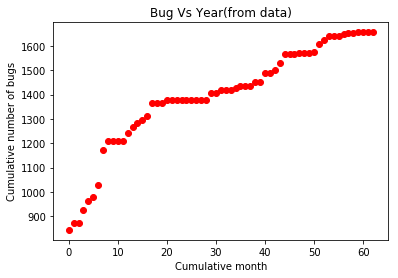

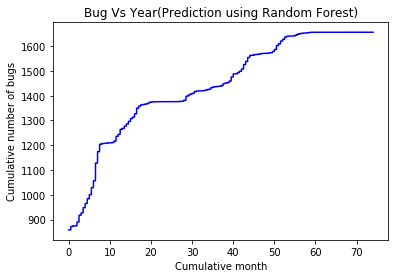

The MRE error is  0.724384273368


In [26]:
z=monthlyPred(Platform_UI_month)
print("The MRE error is ",z)

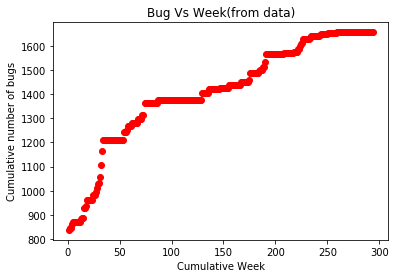

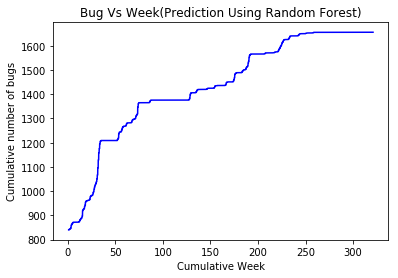

The MRE error is  1.21857690669


In [27]:
z=weeklyPred(Platform_UI_week)
print("The MRE error is ",z)

2.28163805568


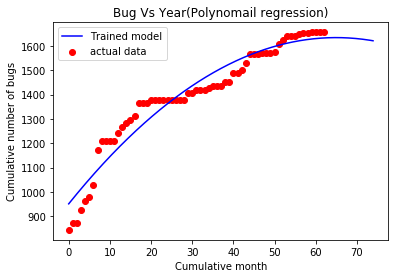

The MRE error is  2.28163805568
2.05235869982


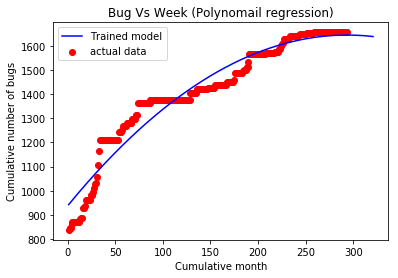

The MRE error is  2.05235869982


In [28]:
z=monthlyPredPolynomial(Platform_UI_month)
print("The MRE error is ",z)
z=weeklyPredPolynomial(Platform_UI_week)
print("The MRE error is ",z)

## For JDT.UI

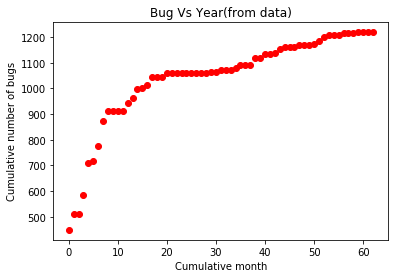

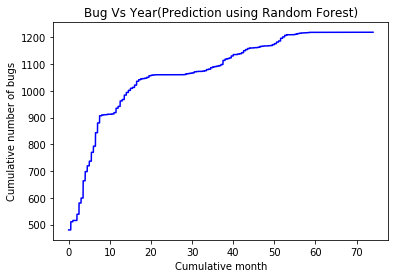

The MRE error is  0.129719396463


In [29]:
z=monthlyPred(JDT_UI_month)
print("The MRE error is ",z)

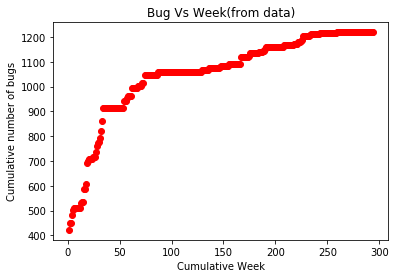

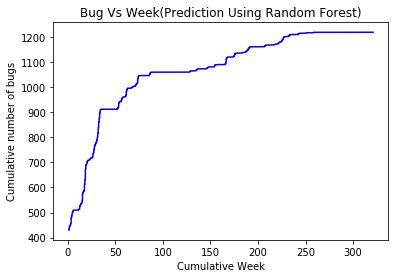

The MRE error is  0.219253369193


In [30]:
z=weeklyPred(JDT_UI_week)
print("The MRE error is ",z)

8.33522433451


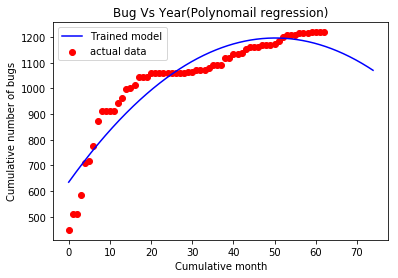

The MRE error is  8.33522433451
5.94721351043


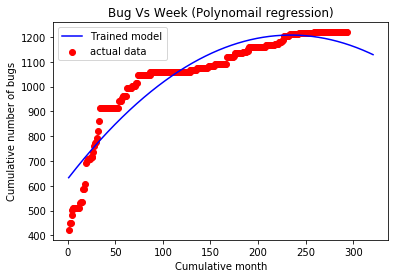

The MRE error is  5.94721351043


In [31]:
z=monthlyPredPolynomial(JDT_UI_month)
print("The MRE error is ",z)
z=weeklyPredPolynomial(JDT_UI_week)
print("The MRE error is ",z)

## For Platform.SWT

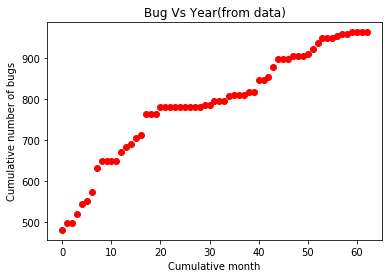

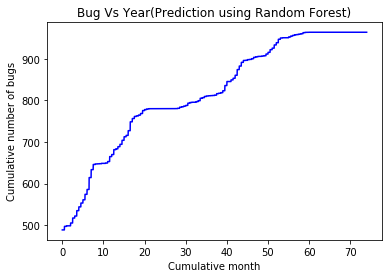

The MRE error is  0.584393262289


In [32]:
z=monthlyPred(Platform_SWT_month)
print("The MRE error is ",z)

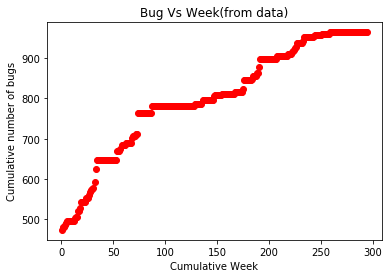

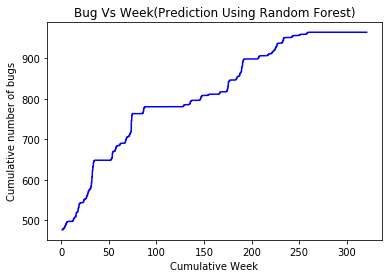

The MRE error is  0.86311382084


In [33]:
z=weeklyPred(Platform_SWT_week)
print("The MRE error is ",z)

0.174281410297


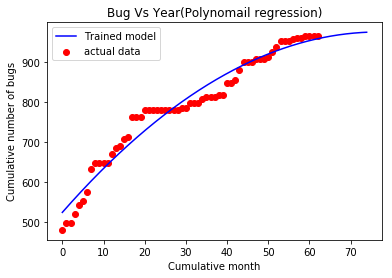

The MRE error is  0.174281410297
0.228017734496


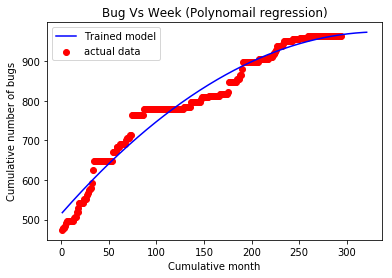

The MRE error is  0.228017734496


In [34]:
z=monthlyPredPolynomial(Platform_SWT_month)
print("The MRE error is ",z)
z=weeklyPredPolynomial(Platform_SWT_week)
print("The MRE error is ",z)

## For Platform.Team

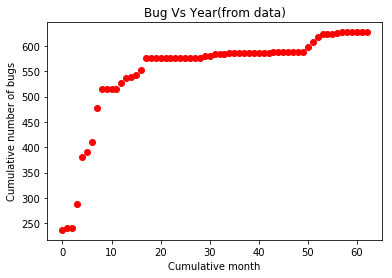

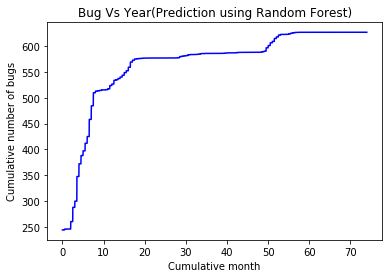

The MRE error is  0.198965380024


In [35]:
z=monthlyPred(Platform_Team_month)
print("The MRE error is ",z)

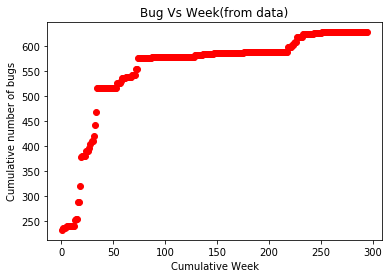

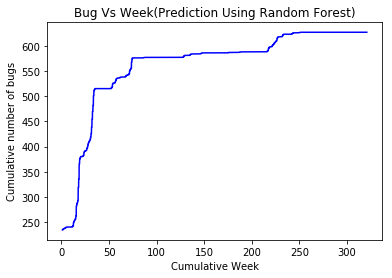

The MRE error is  0.329283524469


In [36]:
z=weeklyPred(Platform_Team_week)
print("The MRE error is ",z)

14.2911063078


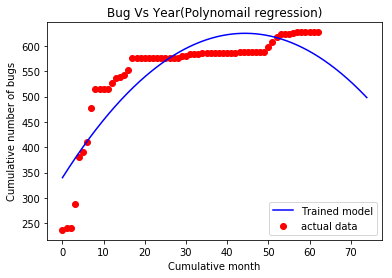

The MRE error is  14.2911063078
10.0174466021


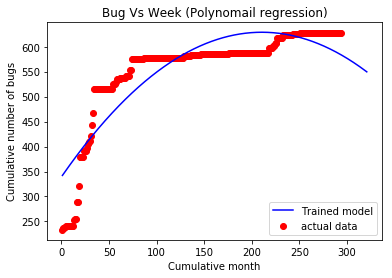

The MRE error is  10.0174466021


In [37]:
z=monthlyPredPolynomial(Platform_Team_month)
print("The MRE error is ",z)
z=weeklyPredPolynomial(Platform_Team_week)
print("The MRE error is ",z)

## For JDT.Core

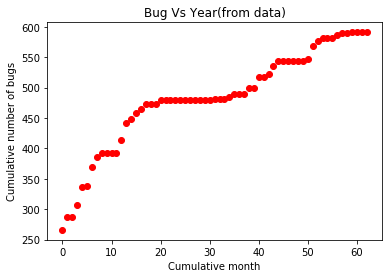

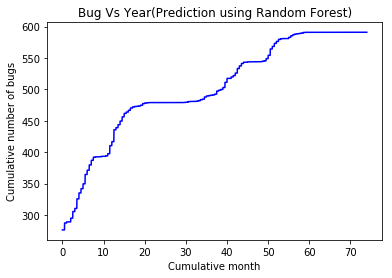

The MRE error is  0.323260716796


In [38]:
z=monthlyPred(JDT_Core_month)
print("The MRE error is ",z)

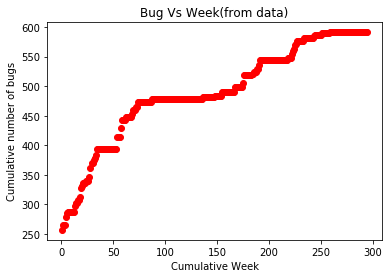

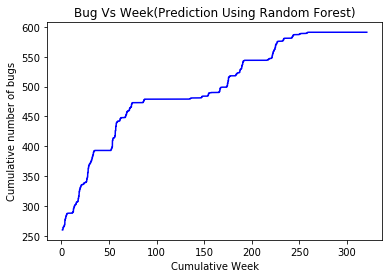

The MRE error is  0.564835957217


In [39]:
z=weeklyPred(JDT_Core_week)
print("The MRE error is ",z)

1.25183012662


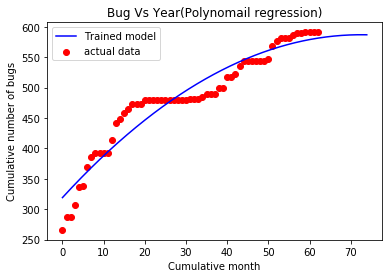

The MRE error is  1.25183012662
0.605269270128


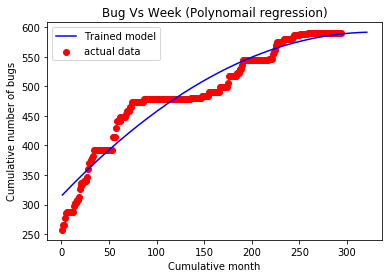

The MRE error is  0.605269270128


In [40]:
z=monthlyPredPolynomial(JDT_Core_month)
print("The MRE error is ",z)
z=weeklyPredPolynomial(JDT_Core_week)
print("The MRE error is ",z)

## For JDT.Debug

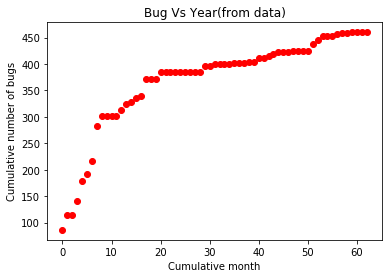

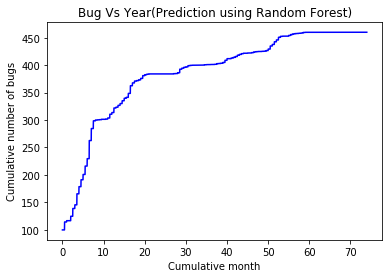

The MRE error is  1.11071300609


In [41]:
z=monthlyPred(JDT_Debug_month)
print("The MRE error is ",z)

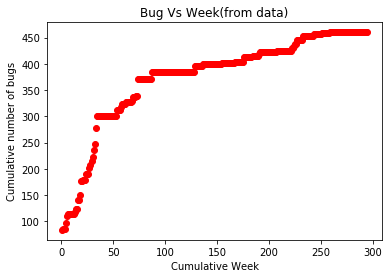

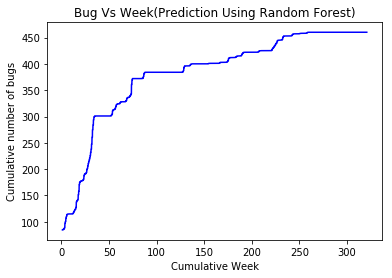

The MRE error is  2.00852099817


In [42]:
z=weeklyPred(JDT_Debug_week)
print("The MRE error is ",z)

13.5798581984


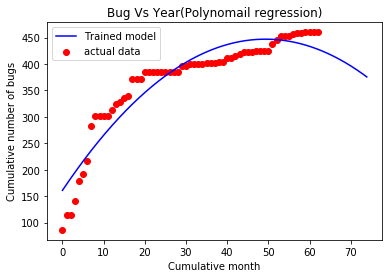

The MRE error is  13.5798581984
10.4055220494


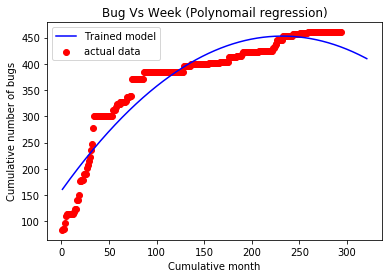

The MRE error is  10.4055220494


In [43]:
z=monthlyPredPolynomial(JDT_Debug_month)
print("The MRE error is ",z)
z=weeklyPredPolynomial(JDT_Debug_week)
print("The MRE error is ",z)

## For PDE.UI

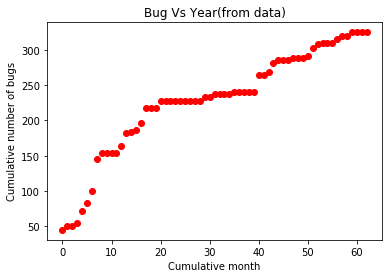

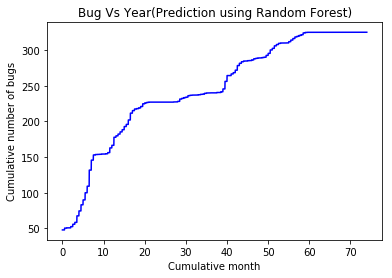

The MRE error is  0.332225913621


In [44]:
z=monthlyPred(PDE_UI_month)
print("The MRE error is ",z)

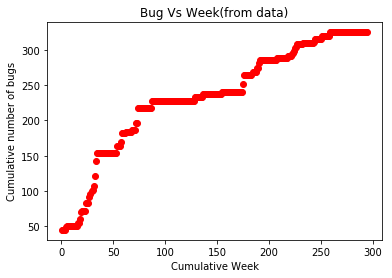

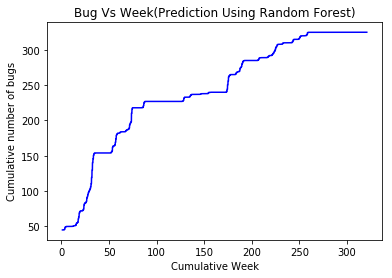

The MRE error is  0.557316140313


In [45]:
z=weeklyPred(PDE_UI_week)
print("The MRE error is ",z)

4.35651236017


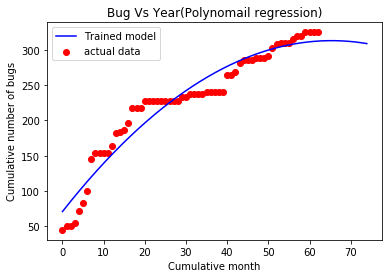

The MRE error is  4.35651236017
2.50968229217


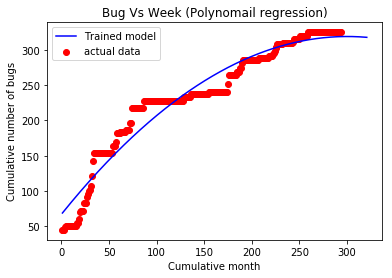

The MRE error is  2.50968229217


In [46]:
z=monthlyPredPolynomial(PDE_UI_month)
print("The MRE error is ",z)
z=weeklyPredPolynomial(PDE_UI_week)
print("The MRE error is ",z)

## For Platform.Debug

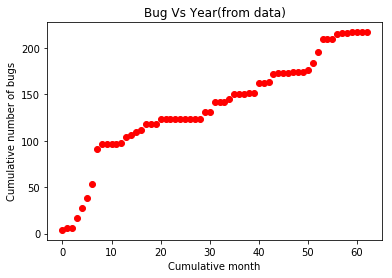

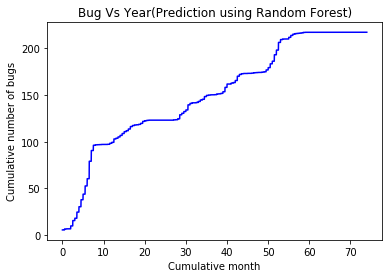

The MRE error is  0.268096514745


In [47]:
z=monthlyPred(Platform_Debug_month)
print("The MRE error is ",z)

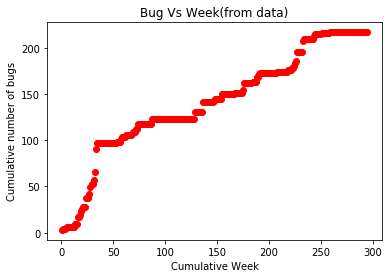

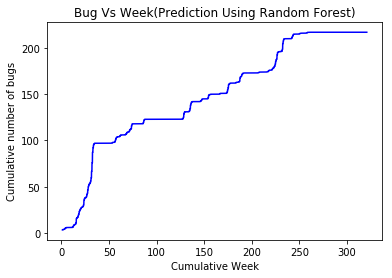

The MRE error is  0.491320013102


In [48]:
z=weeklyPred(Platform_Debug_week)
print("The MRE error is ",z)

0.174281410297


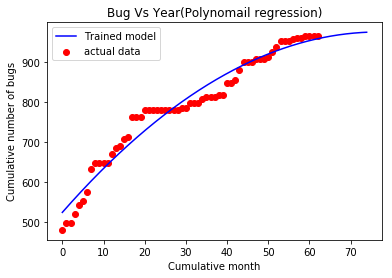

The MRE error is  0.174281410297
0.228017734496


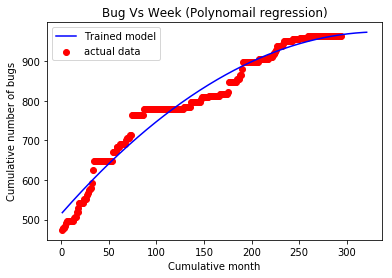

The MRE error is  0.228017734496


In [50]:
z=monthlyPredPolynomial(Platform_SWT_month)
print("The MRE error is ",z)
z=weeklyPredPolynomial(Platform_SWT_week)
print("The MRE error is ",z)

## For Platform.Resources

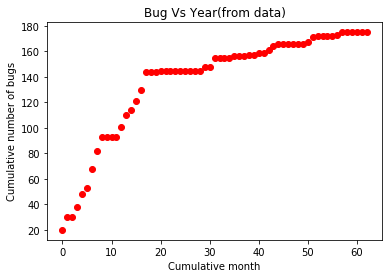

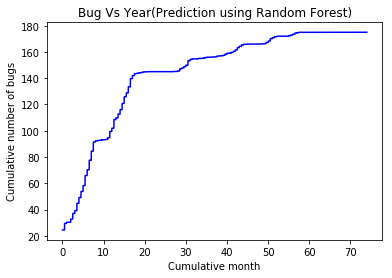

The MRE error is  0.379506641366


In [51]:
z=monthlyPred(Platform_Resources_month)
print("The MRE error is ",z)

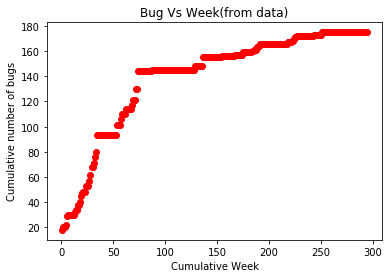

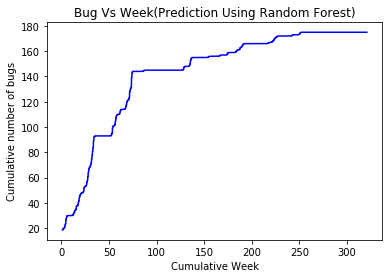

The MRE error is  0.608519269777


In [52]:
z=weeklyPred(Platform_Resources_week)
print("The MRE error is ",z)

15.7727940196


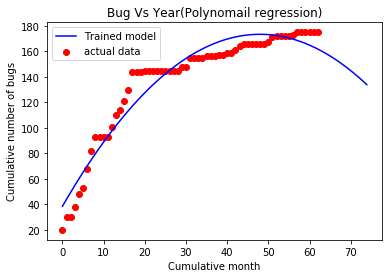

The MRE error is  15.7727940196
11.6502418203


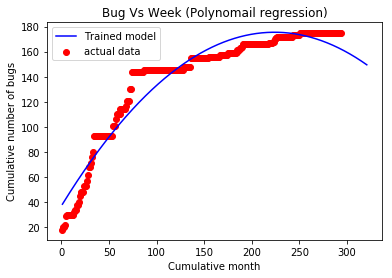

The MRE error is  11.6502418203


In [53]:
z=monthlyPredPolynomial(Platform_Resources_month)
print("The MRE error is ",z)
z=weeklyPredPolynomial(Platform_Resources_week)
print("The MRE error is ",z)

## For Platform.Update

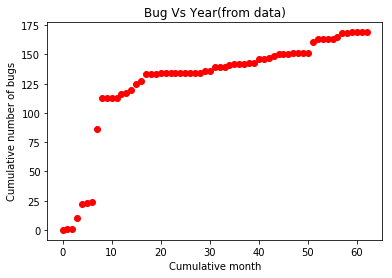

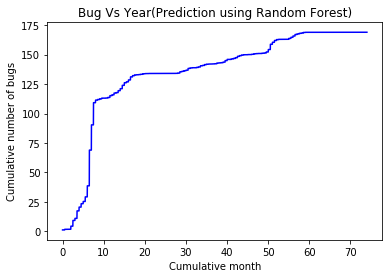

The MRE error is  0.685602350637


In [54]:
z=monthlyPred(Platform_Update_month)
print("The MRE error is ",z)

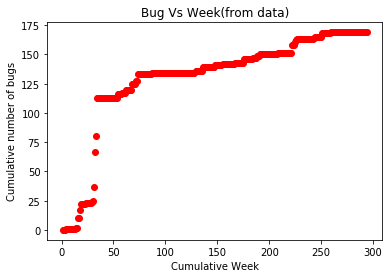

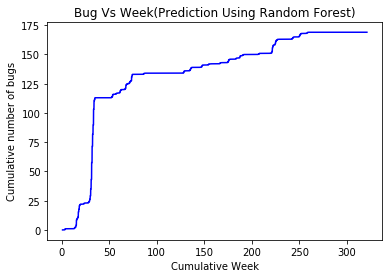

The MRE error is  1.16959064327


In [55]:
z=weeklyPred(Platform_Update_week)
print("The MRE error is ",z)

20.2367061808


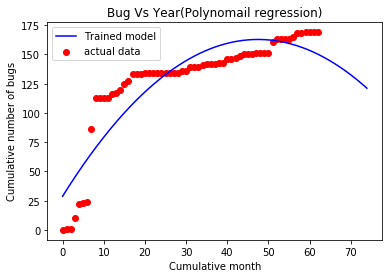

The MRE error is  20.2367061808
14.1503366983


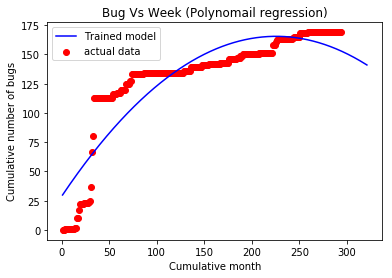

The MRE error is  14.1503366983


In [56]:
z=monthlyPredPolynomial(Platform_Update_month)
print("The MRE error is ",z)
z=weeklyPredPolynomial(Platform_Update_week)
print("The MRE error is ",z)

## For JDT.Text

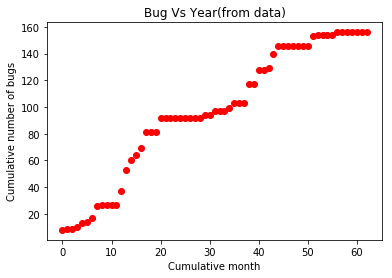

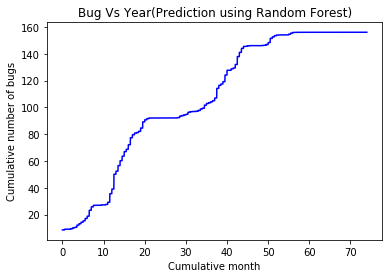

The MRE error is  0.319488817891


In [57]:
z=monthlyPred(JDT_Text_month)
print("The MRE error is ",z)

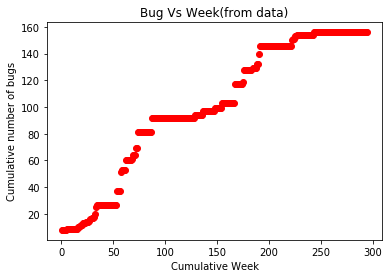

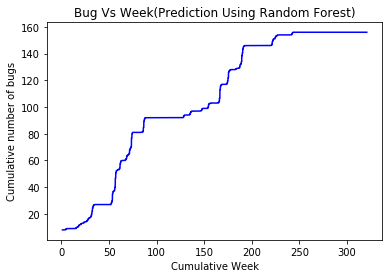

The MRE error is  0.636942675159


In [58]:
z=weeklyPred(JDT_Text_week)
print("The MRE error is ",z)

-6.30353570594


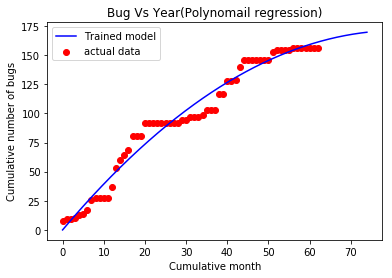

The MRE error is  -6.30353570594
-3.70634195526


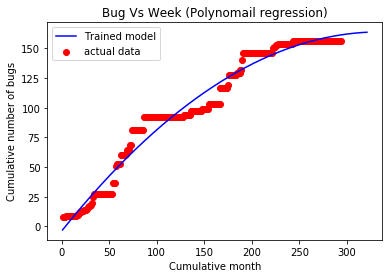

The MRE error is  -3.70634195526


In [59]:
z=monthlyPredPolynomial(JDT_Text_month)
print("The MRE error is ",z)
z=weeklyPredPolynomial(JDT_Text_week)
print("The MRE error is ",z)

## For Platform.UserAssistance

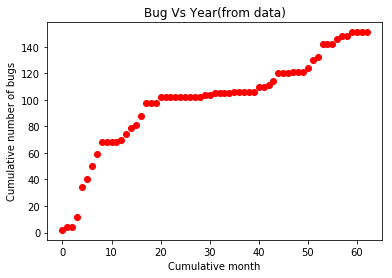

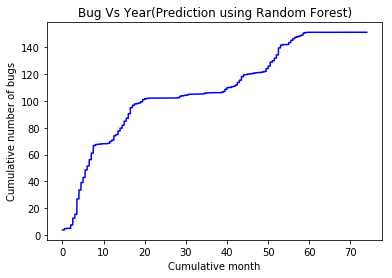

The MRE error is  1.30718954248


In [60]:
z=monthlyPred(Platform_UserAssistance_month)
print("The MRE error is ",z)

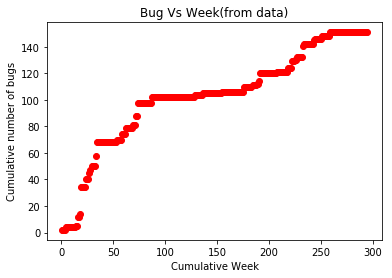

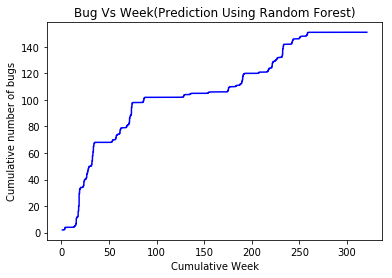

The MRE error is  2.08429828624


In [61]:
z=weeklyPred(Platform_UserAssistance_week)
print("The MRE error is ",z)

8.40332915232


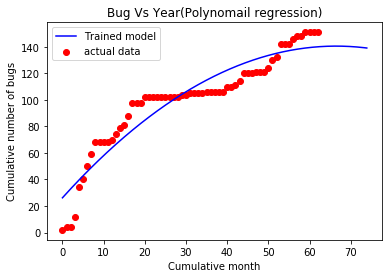

The MRE error is  8.40332915232
5.10278803657


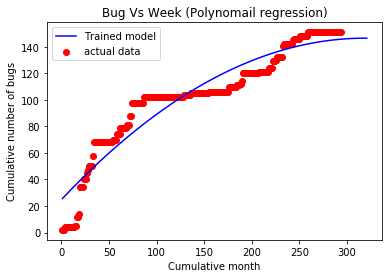

The MRE error is  5.10278803657


In [62]:
z=monthlyPredPolynomial(Platform_UserAssistance_month)
print("The MRE error is ",z)
z=weeklyPredPolynomial(Platform_UserAssistance_week)
print("The MRE error is ",z)

## For Platform.Ant

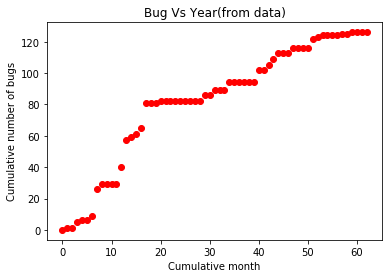

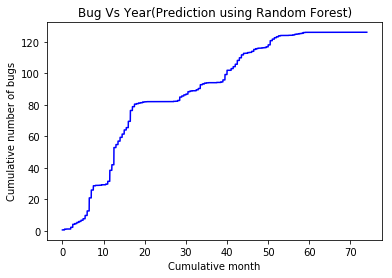

The MRE error is  0.0


In [63]:
z=monthlyPred(Platform_Ant_month)
print("The MRE error is ",z)

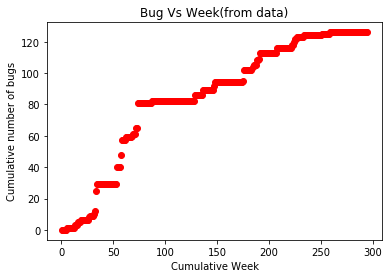

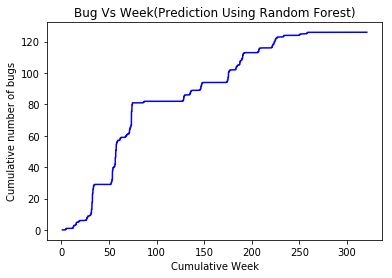

The MRE error is  0.0


In [64]:
z=weeklyPred(Platform_Ant_week)
print("The MRE error is ",z)

4.53019230826


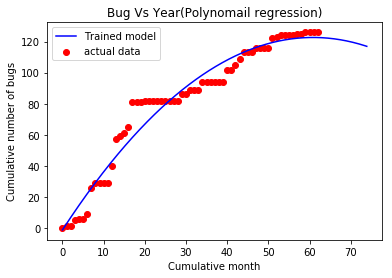

The MRE error is  4.53019230826
3.29867542597


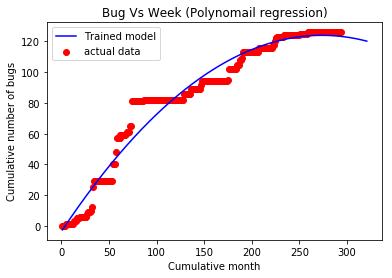

The MRE error is  3.29867542597


In [65]:
z=monthlyPredPolynomial(Platform_Ant_month)
print("The MRE error is ",z)
z=weeklyPredPolynomial(Platform_Ant_week)
print("The MRE error is ",z)

## For Platform.Compare

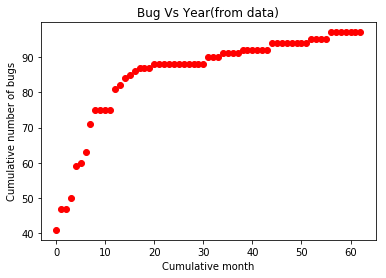

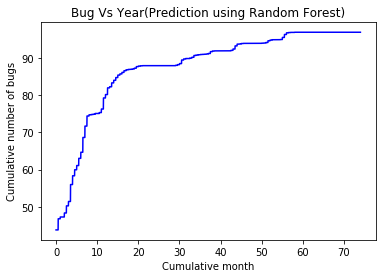

The MRE error is  0.597779675491


In [66]:
z=monthlyPred(Platform_Compare_month)
print("The MRE error is ",z)

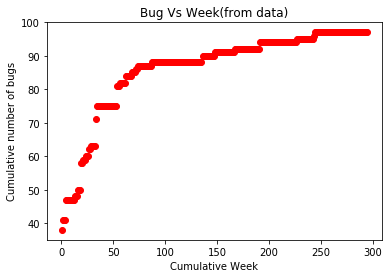

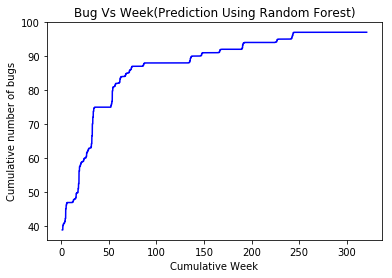

The MRE error is  0.984323733139


In [67]:
z=weeklyPred(Platform_Compare_week)
print("The MRE error is ",z)

11.6626412494


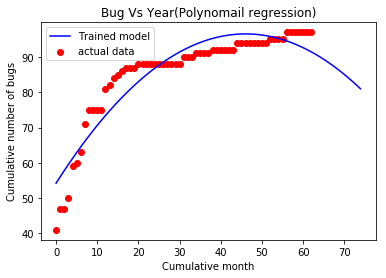

The MRE error is  11.6626412494
8.73295634966


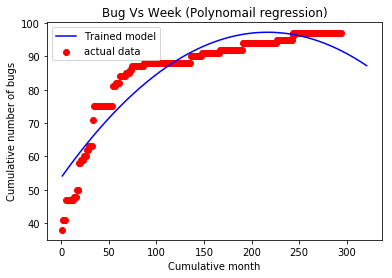

The MRE error is  8.73295634966


In [68]:
z=monthlyPredPolynomial(Platform_Compare_month)
print("The MRE error is ",z)
z=weeklyPredPolynomial(Platform_Compare_week)
print("The MRE error is ",z)